# Intro to Derivative-Free Optimization

In this module we will run our first derivative-free algorithm for low dimensional problems. We will start with 1 dimension problems. <br>

### Motivating Example:
Consider the following problem: <br>
$min $   $f(x) = 2x^2 + \frac{16}{x} $ <br>
$1 \le x \le 5$ <br>

The first thing we want to do is identify the nature of this problem: <br>
 - Non-linear <br>
 - 1Dimension <br>
 - Unconstrained <br>
 - Convex or non convex? <br>
 
Since it is just 1D problem, let's plot it. The formal way would be to calculate its first derivative to find the stationary point: 

$x^3 = 4 => x=1.5874 $ <br>

Second derivative is positive, so it's a minimum! <br>

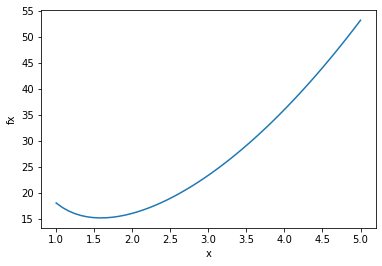

In [1]:
%matplotlib inline
from pylab import *
x = linspace(1,5,50)
y = 2*x**2 + 16/x
plot(x,y)
xlabel('x')
ylabel('fx')
show()

**Now suppose you have no access to the equation of $f(x)$, but I have provided you with the bounds and the fact that it is a convex function. Suppose you had the ability to only collect 3 points total, and give me your best guess of the optimum. What would you do?**


### Notes:
 Collect 3 points, 2 end points and one in the middle.


In [2]:
y1 = 2*1**2 + 16/1
y2 = 2*3**2 + 16/3
y3 = 2*5**2 + 16/5
print(y1,y2,y3)

18.0 23.333333333333332 53.2


### Approach 1: Only using samples
#### Step 1: Pick starting point:
For this example, I would start at an endpoint. For example, let's make it harder and start at $x=5$

In [3]:
x_0 = 5
y_0 = 2*x_0**2 + 16/x_0
print(y_0)

53.2


#### Step 2: Pick step size:
My entire search space is 5-1 = 4, so I can pick a step size of 0.5.
My next evaluation is: 

In [4]:
step = 0.5
x_1 = 5 - step
y_1 = 2*x_1**2 + 16/x_1
print(y_1)

44.05555555555556


#### Step 3: Take another step:
To do this, first I compare my results: y_1<y_0<br>

This means my function value decreased, I am moving towards the correct direction. I have two options:<br>

1. Continue moving towards this direction with same step<br>

2. Continue moving towards this direction with a different step size<br>
<br>

**What would you do???**
**In class exercise: Write a short algorithm that will get to as close as possible to the optimal value, using only a loop, a step size that can change in every iteration and function evaluations. WORK IN GROUPS. You have 10 minutes!** <br>

**Given:** <br>
1. You have to start from x0=5 <br>


**Algorithmically, what is the first thing that you should do???** <br>

**Create a function for f(x). This is your "black-box" function** <br>

In [5]:
def bbf(xin):
    return 2*xin**2 + 16/xin

# First define your step size:
step = -0.5
# Define your starting point:
x0 = 5
f0 = bbf(x0)
print(f0)

#Write your algorithm here:
count=0
while abs(step)>.05:
    fn=bbf(x0+step)
    if fn<f0:
        step=step*1.5
    else:
        step=step*-.5
    f0=fn
    x0=x0+step
    count=count+1
    print('step',step,'from:',x0-step,'to:',x0,'where:',f0)
print(x0,count)
#Reminder of syntax:

##While loop:
#count = 0
#while (count < 5):
#    print("count =", count)
#    count = count + 1
#print("goodbye")

##Reminder of syntax for:
#count = 1
#l = [1,2,3,4]
#for item in l:
#    count = count + item
#    print("count",count)
#print('loop completed')

##Reminder of syntax if:
#temp = 38.
#if temp > 40:
#    print('Wear shorts')
#else:
#    print('Wear pants')

53.2
step -0.75 from: 5.0 to: 4.25 where: 44.05555555555556
step -1.125 from: 4.25 to: 3.125 where: 29.07142857142857
step -1.6875 from: 3.125 to: 1.4375 where: 16.0
step -2.53125 from: 1.4375 to: -1.09375 where: -63.875
step 1.265625 from: -1.09375 to: 0.171875 where: 21.867456896551722
step 1.8984375 from: 0.171875 to: 2.0703125 where: 15.263247282608695
step -0.94921875 from: 2.0703125 to: 1.12109375 where: 35.533449187992126
step 0.474609375 from: 1.12109375 to: 1.595703125 where: 93.1499911221591
step 0.7119140625 from: 1.595703125 to: 2.3076171875 where: 16.30068958210495
step -0.35595703125 from: 2.3076171875 to: 1.95166015625 where: 23.533973644498403
step -0.533935546875 from: 1.95166015625 to: 1.417724609375 where: 15.119464710847254
step 0.2669677734375 from: 1.417724609375 to: 1.6846923828125 where: 19.666033617304176
step 0.40045166015625 from: 1.6846923828125 to: 2.08514404296875 where: 15.816103342446143
step -0.200225830078125 from: 2.08514404296875 to: 1.88491821289062

### Approach 2: Using approximations:
#### Important theorem (Weierstrass Approximation Theorem): 
The Weierstrass theorem states that if a function is continuous in an interval, then it can be perfectly approximated by a polynomial of high enough order. The higher the order of the polynomial, the better the approximation. 

**Important conditions of Weierstrass theorem:** The location of the points you collect as well as the type of polynomial you select to approximate the function with play a role towards the convergence towards a perfect approximation. In fact, Runge showed a counter example, where when using equidistant points and singe-term polynomials (i.e., only polynomials with terms: $x,x^2,x^3,...$, then the approximations actually DIVERGE from true function. This is known as the "Runge phenomenon" (https://en.wikipedia.org/wiki/Runge%27s_phenomenon)

#### Let's go back to our example: 
Since we know it is convex, perhaps a quadratic approximation might be enough to approximate the function. How would we fit the quadratic approximation?

##### Step 1: Collect at least 3 points: 
$x_1 = 1$
$x_2 = 3$
$x_3 = 5$

In [6]:
x1=1
x2=3
x3=5
f1=bbf(x1)
f2=bbf(x2)
f3=bbf(x3)
print(f1,f2,f3)

18.0 23.333333333333332 53.2


#### Step 2: Build the quadratic approximation:
$q(x) = a_0 + a_1(x-x_1)+a_2(x-x_1)(x-x_2)$
Since we are trying to find $a_0,a_1,a_2$ to best approximate the function, we need to interpolate the points.

**IMPORTANT: We have 3 points, 3 parameters --> CLOSED FORM SOLUTION! **

$q(x_1) = a_0 = f(x_1)$

$q(x_2) = f(x_1) + a_1(x_2 - x_1) = f(x_2)$

$q(x_3) = f(x_1) + \frac{f(x_2)-f(x_1)}{x_2-x_1} + a_2(x_3-x_1)(x_3-x_2) = f(x_3)$

**From the above system of equations we can calculate the three parameters explicitly**

In [7]:
a0=f1
a1=(f2-f1)/(x2-x1)
a2=(1/(x3-x2))*(((f3-f1)/(x3-x1))-((f2-f1)/(x2-x1)))
print(a0,a1,a2)

18.0 2.666666666666666 3.0666666666666673


Then all we need to do is find the stationary point of $q(x)$
If we set the derivative of $q(x)=0$, we get the stationary point of 1.565

In [8]:
print("relative err=",(100*(1.5874-1.565)/1.5874))

relative err= 1.411112511024315


We found the optimum with a 1.4% relative error!!!

# Derivative-Free Optimization using "surrogates" 

## Reminders from last lectures:

1. We talked about the basics of using **only samples** to locate stationary point. The three things needed are:
 - Initial Point
 - Initial Step size
 - Mechanism to move towards "descent" or "minimum" directions, while driving the step-size to small value (And remaining within feasible region!).
 
2. The alternative is to collect more than 1 data point at a time, and use those to fit functions. Then the functions are used as **"surrogates"**, which are optimized using gradient-based solvers.


Let's pick up where we left off:

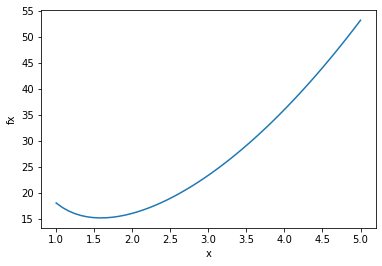

In [9]:
%matplotlib inline
from pylab import *
import numpy as np

def bbf(xin):
    return 2*xin**2 + 16/xin 

x = linspace(1,5,50)
y = bbf(x)
plot(x,y)
xlabel('x')
ylabel('fx')
show()

We used three points to fit a quadratic function to this "unknown" $f(x)$:
$x_1 = 1$
$x_2 = 3$
$x_3 = 5$

18.756129062891265 2.979917538306177 2.8994070416175353


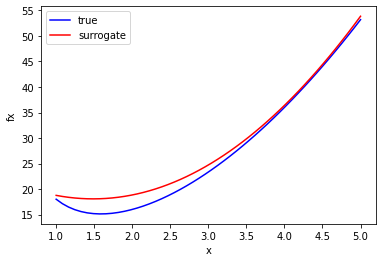

In [10]:
x1=1
x2=3
x3=5
f1=bbf(x1)+ np.random.uniform(0.1,2)
f2=bbf(x2)+ np.random.uniform(0.1,2)
f3=bbf(x3)+ np.random.uniform(0.1,2)
a0=f1
a1=(f2-f1)/(x2-x1)
a2=(1/(x3-x2))*(((f3-f1)/(x3-x1))-((f2-f1)/(x2-x1)))
print(a0,a1,a2)

def quad_surr(xin):
    return a0 + a1*(xin-x1) + a2*(xin-x1)*(xin-x2)

#PLOT THE SURROGATE APPROXIMATION. IS IT A GOOD APPROXIMATION????
#x = linspace(1,5,50)
y1 = bbf(x)
y2 = quad_surr(x)
fig, ax = subplots()
ax.plot(x,y1,'b',label="true")
ax.plot(x,y2,'r',label="surrogate")
ax.legend(loc=2)
xlabel('x')
ylabel('fx')
show()

You should verify that this approximation is good, but not perfect. So, I can now use *Ipopt* in Pyomo to optimize this function:

In [11]:
from pyomo.environ import *

model = ConcreteModel()
model.x = Var(within=NonNegativeReals)
model.N = [1,2,3]
model.a = {1:a0,2:a1,3:a2}
model.fx = {1:x1,2:x2,3:x3}

model.obj = Objective(expr=model.a[1]+model.a[2]*(model.x-model.fx[1]) + model.a[3]*(model.x-model.fx[1])*(model.x-model.fx[2]))

solver = SolverFactory('ipopt')
solver.solve(model)
model.pprint()

    ipopt


ApplicationError: No executable found for solver 'ipopt'

We found an optimum that is very close to the actual optimum, but this is due to two reasons:
1. The approximation was very good <br>
2. The approximation was a nice quadratic model that Ipopt can optimize globally <br>

Now you should start to 'foresee' the issues of fitting models. The quality of model-based optimization algorithms depend on:

1. the quality of the fit,
2. whether the fit is convex or not so that we can actually optimize it

**TIP: Remember these when choosing what you are going to do for your projects!!!**

### Fitting "local" models for optimization:
Imagine now the function we wanted to minimize looked like this:

$f(x)=x^2 + 20sin(2x)$

$1 \le x \le 5$

**IN CLASS EXERCISE: Take the same thee points and use the same approach to fit a quadratic model to this function. Plot the two to compare: **

18.756129062891265 2.979917538306177 2.8994070416175353


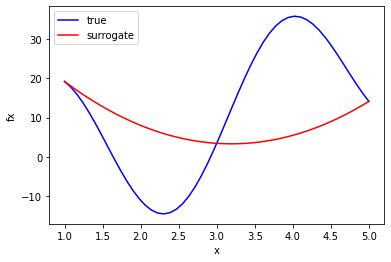

In [12]:
from numpy import sin

def bbf2(xin):
    return xin**2 + 20*sin(2*xin)

x1=1
x2=3
x3=5
f1=bbf2(x1)
f2=bbf2(x2)
f3=bbf2(x3)
a20=f1
a21=(f2-f1)/(x2-x1)
a22=(1/(x3-x2))*(((f3-f1)/(x3-x1))-((f2-f1)/(x2-x1)))
print(a0,a1,a2)

def quad_surr2(xin):
    return a20 + a21*(xin-x1) + a22*(xin-x1)*(xin-x2)

#PLOT THE SURROGATE APPROXIMATION. IS IT A GOOD APPROXIMATION????
#x = linspace(1,5,50)
y1 = bbf2(x)
y2 = quad_surr2(x)
fig, ax = subplots()
ax.plot(x,y1,'b',label="true")
ax.plot(x,y2,'r',label="surrogate")
ax.legend(loc=2)
xlabel('x')
ylabel('fx')
show()

**You must have observed that even if the fit, perfectly "fits" the data at the three points, it is a very bad approximation otherwise. As a result:**
 -  *If we simply optimized this function, we would get a very 'wrong' approximate objective.*
 
**How can we fix this? ANY IDEAS???**

 - Idea 1: Add samples, check errors, refit.
 - Idea 2: Use different type of surrogate function.
 - One more idea is to fit "local" models. No matter how "multimodal" a function is, if you break the search space into pieces, each piece will behave either like a "quadratic-type" function or even a "linear-type" function.
**This is the concept "local-search" "model-based" derivative-free algorithms are based on. They are also called *"TRUST-REGION"* methods!**
 
#### Powell's Successive Quadratic Estimation Method:
Steps of the algorithm:

Let $x_1$ be the initial point and $dx$ be the step size. <br>

**STEP 1:** Compute $x_2 = x_1 + dx$ <br>

**STEP 2:** Evaluate $f(x_1), f(x_2)$ <br>

**STEP 3:** If $f(x_1) \gt f(x_2)$, let $x_3=x_1+2dx$ <br>
            If $f(x_1) \le f(x_2)$, let $x_3=x_1-dx$

**STEP 4:** Evaluate $f(x_3)$ and find minimum so far: $F_{min} = min[f(x_1),f(x_2),f(x_3)]$. Also $X_{min} =$ point corresponding to $F_{min}$. <br> 
 
**STEP 5:** Use points $x_1,x_2,x_3$ to fit a quadratic function. Optimize it, or calculate the stationary point analytically, to find $x_{qmin}$, which corresponds to the minimum of the quadratic fit. <br>

**STEP 6:** Check for termination/convergence:
 1. Is the distance between $F_{min}$ and $f(x_{qmin})$ very small?
 2. Is the distance between $X_{min}$ and $x_{qmin}$ very small?
If both 1 and 2 are satisfied, terminate. Otherwise go to Step 7.<br>

**STEP 7:** Save the currently best point ($X_{min}$  or  $x_{qmin}$), and the two points bracketing the best point. Go to Step 4.<br>

**END OF ALGORITHM**

# Direct-Search Optimization in multiple dimensions:

### A bit of history: 
*From the paper: Kolda, Lewis, Torczon, Optimization by Direct-Search, SIAM Review, 2003:* <br>

...Enrico Fermi and Nicholas Metropolis used one of the first digital computers,the Los Alamos Maniac, to determine which values of certain theoretical parameters (phase shifts) best fit experimental data (scattering cross sections). They varied one theoretical parameter at a time by steps of the same magnitude, and when no such increase or decrease in any one
parameter further improved the fit to the experimental data, they halved the step size and repeated the process until the steps were deemed sufficiently small. Their simple procedure was slow but sure, and several of us used it on the Avidac computer at the Argonne National Laboratory for adjusting six theoretical parameters to fit the pion-proton scattering data
we had gathered using the University of Chicago **synchrocyclotron**.... <br> 

The first simplest direct-search algorithm in multiple dimensions, is called **"COMPASS-SEARCH"**. It is slow but sure, if there is no significant noise in the data. So if your problem is relatively low dimension ~2-5 variables and it does not take a long time to get one sample, this can work quite well. <br>

**Below is a figure from the same paper, showing how the compass algorithm works on solving the following problem:**

$min$  $f(x_1,x_2)$ = $|(3-2x_1)x_1-2x_2+1|^{(7/3)}$ + $|(3-2x_2)x_2-x_1+1|^{(7/3)}$

<img src="direct_search.tif" width="1000" />

## Optimization Algorithms in scipy package:

 - So far we have talked about optimization in **Pyomo**. Pyomo is a sophisticated package, specifically designed to solve problems with advanced derivative-based optimization solvers. <br>
 - There are other sources of optimization codes, within the scipy package and also many user implementations that are shared on github. <br>
 - How do I know what to use? <br>
     - If you want to use gradient-based solvers, use Pyomo solvers that you already have access to.
     - If you need to solve large MILP and MINLP problems (where the nonlinearity is only quadratic and bilinear terms), use "GUROBI". (You can get free academic license using your gatech email).
     - Some direct-search solvers are also available via *scipy* package.
     - Always have some idea of what your model is, and look into the characteristics of the algorithm you are about to use to make informed decisions!!!
     - There are also github, open-source scripts that are reproductions of algorithms you might want to use. Generally, be mindful of what you use and the extent of which you trust it. A lot of codes out there are reliable, but don't automatically assume they are 100% "bug-free". Developers want you to identify those and report back to them. <br>
 
 
### Scipy.optimize: 
 - What optimization solvers can be found in the *scipy.optimize* package? <br>

In [ ]:
from pylab import *
from scipy.optimize import minimize

def rosen(x):
    """The Rosenbrock function"""
    return sum(100.0*(x[1:]-x[:-1]**2.0)**2.0 + (1-x[:-1])**2.0)

x0 = np.array([1.3, 0.7])
res = minimize(rosen, x0, method='nelder-mead',options={'xtol': 1e-8, 'disp': True})
print(res.x)


## Positive spanning sets and Positive Basis:

**ASSUMPTIONS:** <br>
1. Minimizing a function

**Direct - search**: <br>

 - All DIRECT-SEARCH algorithms depend on the idea that when the algorithm samples on the "pattern" (i.e., north, south, west, east), if there exists a "descent direction", they will definitely find it.
 - If that property does not hold, then none of them would work, since there would be a chance they would miss a stationary point.
 - How is that ensured? --> By using **"positive basis"** sets:
 

**DEFINITION 1:**

A positive linear span of a set of vectors $[v_1, v_2,...,v_r]$ in $\mathbb{R}^n$ is the convex cone:

${v \in \mathbb{R}^n: v=a_1v_1+a_2v_2 + .. + a_rv_r, a_i \ge 0, i=1,..,r}$ <br>

**DEFINITION 2:**

A positive spanning set in $\mathbb{R}^n$  is a set of vectors whose positive span is $\mathbb{R}^n$.

**DEFINITION 3:**

The set of vectors $[v_1, v_2,...,v_r]$ is positively *dependent* if one of the vectors is a positive combination of others. Otherwise, the set is known as positively *independent*.

**DEFINITION 4:**

A **Positive Basis** in $\mathbb{R}^n$ is a positively independent set whose positive span is $\mathbb{R}^n$.


**We know the following about positive basis sets:**

1. A positive basis cannot contain more than $2n$ elements and no less than $n+1$ elements, where $n$ is the dimension of the problem.

2. A positive basis with $2n$ elements is called a maximal positive basis.

3. A positive basis with $n+1$ elements is called a minimal positive basis.

**EXAMPLE:**

For $n=2$ (or else in $\mathbb{R}^2$ which means in the 2-Dimensional continuous space of real numbers), a maximal positive basis set is:

$D_{max} = \left( \begin{array}{cc} 1 & 0 & -1 & 0 \\
0 & 1 & 0 & -1 \end{array} \right) $

For $n=2$, a minimal positive basis set is:

$D_{min} = \left( \begin{array}{cc} 1 & 0 & \frac{-\sqrt{2}}{2}  \\
0 & 1 & \frac{-\sqrt{2}}{2} \end{array} \right) $ 


For $n=2$, if we add the following vector to the minimal positive basis above:
$D = \left( \begin{array}{cc} 1 & 0 & \frac{-\sqrt{2}}{2}  & 0\\
0 & 1 & \frac{-\sqrt{2}}{2} & -1\end{array} \right) $ 

We have created a positive spanning set that is not a positive basis. Because the vectors are not independent.

**Can you figure out why???**

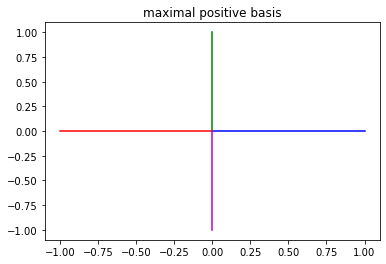

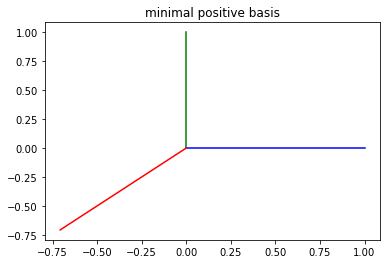

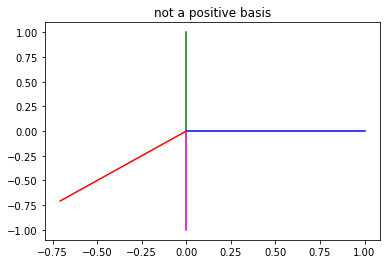

In [13]:
%matplotlib inline
from pylab import *
import numpy as np

x = linspace(0,1,10)
x1 = linspace(0,sqrt(2)/2,10)
y3 = x*0
y1 = x*-(sqrt(2)/2)
fig1, ax1 = subplots()
ax1.plot(x,y3,'b')
ax1.plot(-x,y3,'r')
ax1.plot(y3,x,'g')
ax1.plot(y3,-x,'m')
title('maximal positive basis')
show()

fig2, ax2 = subplots()
ax2.plot(x,y3,'b')
ax2.plot(y3,x,'g')
ax2.plot(y1,-x1,'r')
title('minimal positive basis')
show()

fig3, ax3 = subplots()
ax3.plot(x,y3,'b')
ax3.plot(y3,x,'g')
ax3.plot(y1,-x1,'r')
ax3.plot(y3,-x,'m')
title('not a positive basis')
show()

**WHY DO WE CARE ABOUT ALL ABOVE?**
1. There is a lot of theory accompanying direct-search algorithms (the simple ideas of moving north,south,west,east) have a theoretical meaning.

2. If we collect data in "positive basis" sets, then there are theorems that guarantee:
 - The "descent" direction can be found.
 - If we use this data to fit surrogate models (i.e., linear or quadratic), we will not have to deal with problems of inverting singular matrices.
 - If we use a minimal positive basis, we basically sample the least possible, to guarantee that "descent" directions are found when they exist.


## Simplex:

The concept of a simplex is related to the **minimal positive bases** that we defined above, and the concept of the **convex hull**.

**DEFINITION: Convex Hull:**
A *convex hull* of a set of points $X$, is the smallest *Convex Set* that contains $X$. It is also called a convex envelope.

<img src="258px-ConvexHull.svg.png" width="500" />

**DEFINITION: Simplex:**
A simplex is the convex hull of a given set. For example:
 - a simplex of dimension 0 is a point,
 - a simplex of dimension 1 is a line segment,
 - a simplex of dimension 2 is a triangle,
 - a simplex of dimension 3 is a tetrahedron,

## Nelder - Mead algorithm:

1. Developed in 1965
2. Original publication cited *27983* times (google data)
3. The method uses a "simplex" but do not confuse this with the LP "Simplex" method

**Algorithm:**

 - The algorithm searches over points that belong on a simplex. 
 - The main search strategy of the algorithm is to identify the **worse** vertex or point (one with highest value) and modify it.
 - Rules exist on how to replace the worse vertex, and whether to expand the search or contract the search.
 - Typically, reflective steps are taken, as shown below:
 
 
<img src="nm.png" width="500" />

**Does it always work???**
 - No, and counter-examples have been shown:
 - Issues that can arise are cycling between vertices if the right contractions/expansions/shrinkage steps are not taken.
 - Other trust-region algorithms that ensure satisfying the use of positive basis sets, suffer from this problem less.
 
<img src="Nelder-Mead_Rosenbrock.gif" width="500" />

In [14]:
## Python implementation of N-M algorithm.
from pylab import *
from scipy.optimize import minimize

def rosen(x):
    """The Rosenbrock function"""
    return sum(100.0*(x[1:]-x[:-1]**2.0)**2.0 + (1-x[:-1])**2.0)

x0 = np.array([1.3, 0.7])
res = minimize(rosen, x0, method='nelder-mead',options={'xtol': 1e-8, 'disp': True})
print(res.x)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 79
         Function evaluations: 150
[1. 1.]


**State of the art software using direct-search algorithms:**
The software **NOMAD**, developed by a group in Canada is a state-of-the-art direct-search algorithm that has capabilities of doing local, direct-search with and without constraints, with and without the use of surrogates.